In [29]:
%matplotlib inline

import colorsys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from bokeh.plotting import figure, show
from bokeh.resources import CDN
from bokeh.io import output_notebook
output_notebook( resources=CDN )
import math

pd.set_option('max_colwidth', 200)

Loading BokehJS ...

In [30]:
lines       = pd.read_csv('london.lines.csv', index_col=0)
stations    = pd.read_csv('london.stations.csv', index_col=0)
stationsRein= pd.read_csv('london.stations.reindexed.csv', index_col=0)
connections = pd.read_csv('london.connections.csv')

C:\Users\THMBa\Miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\THMBa\Miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


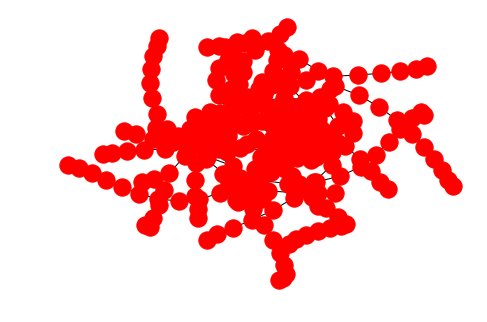

In [31]:
graph = nx.Graph()

for connection_id, connection in connections.iterrows():
    station1_name = stations.ix[connection['station1']]['name']
    station2_name = stations.ix[connection['station2']]['name']
    graph.add_edge(station1_name, station2_name, time = connection['time'])
    
#add the connection between Bank and Monument manually
graph.add_edge('Bank', 'Monument', time = 1)
nx.draw(graph)

In [25]:
nx.shortest_path(graph, 'Oxford Circus', 'Canary Wharf', weight='time')

['Oxford Circus',
 'Tottenham Court Road',
 'Holborn',
 'Chancery Lane',
 "St. Paul's",
 'Bank',
 'Shadwell',
 'Wapping',
 'Rotherhithe',
 'Canada Water',
 'Canary Wharf']

In [26]:
print(graph)

In [32]:
normed = stations[['longitude', 'latitude']]
normed = normed - normed.min()
normed = normed / normed.max()
locations = dict(zip(stations['name'], normed[['longitude', 'latitude']].values))

p = figure(
    x_range = (.4,.7),
    y_range = (.2,.5),
    height= 700,
    width= 900,
)
for edge in graph.edges():
    p.line( 
        x= [locations[pt][0] for pt in edge],
        y= [locations[pt][1] for pt in edge],
    )

for node in graph.nodes():
    x = [locations[node][0]]
    y = [locations[node][1]]
    p.circle(
        x, y, 
        line_alpha=0)
    p.text(
        x, y, 
        text = {'value':node}, 
        text_font_size = str(10) +"pt",
        text_align='center',
        text_font_style='bold')
    
show(p)

In [ ]:
nx.algorithms.connectivity.cuts.minimum_node_cut(graph)

In [ ]:
nx.algorithms.connectivity.stoerwagner.stoer_wagner(graph)

In [34]:
#math random 2 co-ordinates
import random

latcoors = stationsRein['latitude']
longcoors = stationsRein['longitude']
latmean = latcoors.mean()
longmean = longcoors.mean()

meancoors = (latmean, longmean)
#print(meancoors)
longitudeBoundSize = 0.3
latitudeBoundSize = 0.3

randLat1 = meancoors[0] + (random.uniform(0,1)*latitudeBoundSize - (latitudeBoundSize/2))
randLong1 = meancoors[1] + (random.uniform(0,1)*longitudeBoundSize - (longitudeBoundSize/2))
randLat2 = meancoors[0] + (random.uniform(0,1)*latitudeBoundSize - (latitudeBoundSize/2))
randLong2 = meancoors[1] + (random.uniform(0,1)*longitudeBoundSize - (longitudeBoundSize/2))

#calculate distances to all stations in array from co-ordinates
distances1 = []
distances2 = []
for i in range(1, len(stationsRein['longitude'])):
    distance1 = math.sqrt((randLat1 - stationsRein['latitude'].iloc[i-1])**2 + (randLong1 - stationsRein['longitude'].iloc[i-1])**2)
    distance2 = math.sqrt((randLat2 - stationsRein['latitude'].iloc[i-1])**2 + (randLong2 - stationsRein['longitude'].iloc[i-1])**2)
    #print(stationsRein['name'].iloc[i-1])
    #print(i)
    #print(stationsRein['latitude'].iloc[i-1])
    #print(distance1)
    
    distances1.append(distance1)
    distances2.append(distance2)

#pick shorest for each co-ordinate
station1 = distances1.index(min(distances1))
station2 = distances2.index(min(distances2))
#print(station1)
#print(distances1[station1])
print("Random Coors1:", randLat1,",", randLong1)
print("Nearest station to Coors1:", stationsRein['name'][station1+1])
print("Random Coors2:", randLat2,",", randLong2)
print("Nearest station to Coors2:", stationsRein['name'][station2+1])

#calculate shortest time taken to travel between 2 the 2 stations (Djikstras)
#return this value

Random Coors1: 51.49258543395573 , -0.14634416666371344
Nearest station to Coors1: Victoria
Random Coors2: 51.620894416311586 , -0.09764893453405293
Nearest station to Coors2: Bounds Green
